## Import des librairies ##

In [5]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [7]:
# prompt: Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/B3_CollecteDonnees/TP_Collecte/passagers.csv') # Remplacez par le chemin correct si nécessaire
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [8]:

test = pd.read_csv('/content/drive/MyDrive/B3_CollecteDonnees/TP_Collecte/test.csv') # Remplacez par le chemin correct si nécessaire
test.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


1.3 Afficher les informations des deux DataFrames train et Test.

In [9]:
# prompt: Afficher les informations des deux DataFrames train et Test.

print("Train DataFrame Information:")
train.info()
print("\nTest DataFrame Information:")
test.info()


Train DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----

1.4 Calculer le taux global de survie

In [11]:

survival_rate = train['Survived'].mean() * 100
print(f"Le taux global de survie est de {survival_rate:.2f}%")


Le taux global de survie est de 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?




#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?




#### Question 3 : Quel est le rôle de ces deux sets de données ?




## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

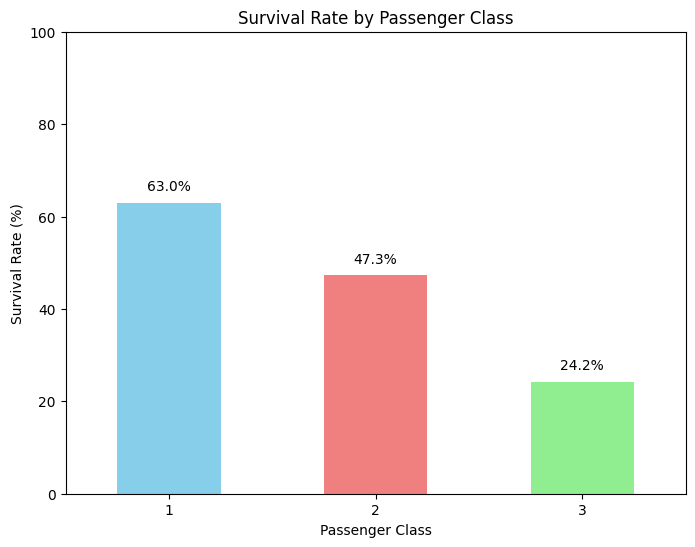

In [32]:

class_survival_rates = train.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
class_survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)


for i, rate in enumerate(class_survival_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

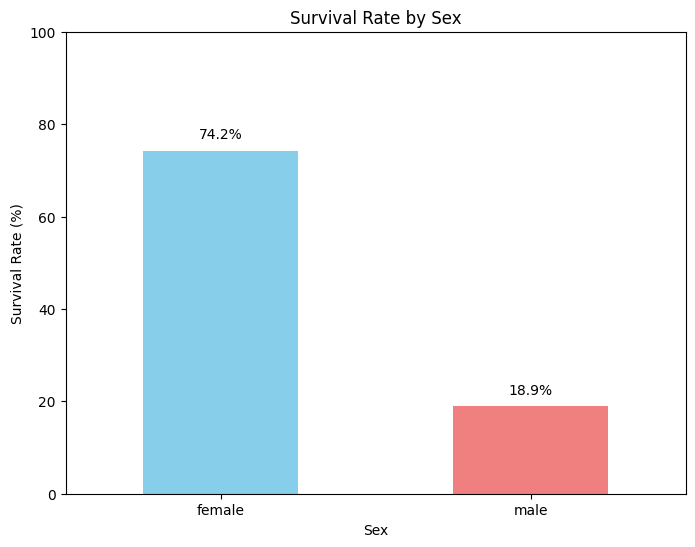

In [33]:
sex_survival_rates = train.groupby('Sex')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
sex_survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

for i, rate in enumerate(sex_survival_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [20]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
display(train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10))


,PassengerId,Name,Age,Sex,FamilySize
159,160,"Sage, Master. Thomas Henry",NaN,male,11
485,486,"Lefebre, Miss. Jeannie",NaN,female,5
154,155,"Olsen, Mr. Ole Martin",NaN,male,1
790,791,"Keane, Mr. Andrew ""Andy""",NaN,male,1
404,405,"Oreskovic, Miss. Marija",20.0,female,1
101,102,"Petroff, Mr. Pastcho (""Pentcho"")",NaN,male,1
796,797,"Leader, Dr. Alice (Farnham)",49.0,female,1
342,343,"Collander, Mr. Erik Gustaf",28.0,male,1
41,42,"Turpin, Mrs. William John Robert (Dorothy Ann ...",27.0,female,2
56,57,"Rugg, Miss. Emily",21.0,female,1


2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

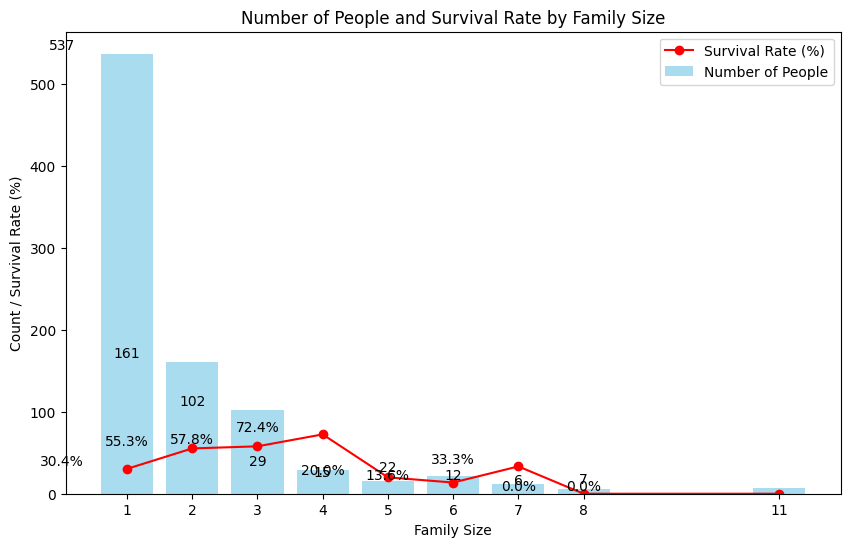

In [22]:
# prompt:  nombre de personnes et le taux de survie par taille de famille un seul grapgh

import matplotlib.pyplot as plt
family_size_stats = train.groupby('FamilySize')['Survived'].agg(['count', 'mean'])
family_size_stats['mean'] *= 100

plt.figure(figsize=(10, 6))
plt.bar(family_size_stats.index, family_size_stats['count'], label='Number of People', color='skyblue')
plt.plot(family_size_stats.index, family_size_stats['mean'], marker='o', color='red', label='Survival Rate (%)')
plt.xlabel('Family Size')
plt.ylabel('Count / Survival Rate (%)')
plt.title('Number of People and Survival Rate by Family Size')
plt.xticks(family_size_stats.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add data labels for count
for i, count in enumerate(family_size_stats['count']):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

# Add data labels for survival rate
for i, rate in enumerate(family_size_stats['mean']):
    plt.text(i, rate, f'{rate:.1f}%', ha='center', va='bottom', color='red')

plt.show()


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [25]:
# prompt: Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

display(train[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].sample(10))


,PassengerId,Name,Age,Sex,IsAlone
103,104,"Johansson, Mr. Gustaf Joel",33.0,male,1
631,632,"Lundahl, Mr. Johan Svensson",51.0,male,1
2,3,"Heikkinen, Miss. Laina",26.0,female,1
580,581,"Christy, Miss. Julie Rachel",25.0,female,0
244,245,"Attalah, Mr. Sleiman",30.0,male,1
340,341,"Navratil, Master. Edmond Roger",2.0,male,0
478,479,"Karlsson, Mr. Nils August",22.0,male,1
795,796,"Otter, Mr. Richard",39.0,male,1
518,519,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",36.0,female,0
308,309,"Abelson, Mr. Samuel",30.0,male,0


2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

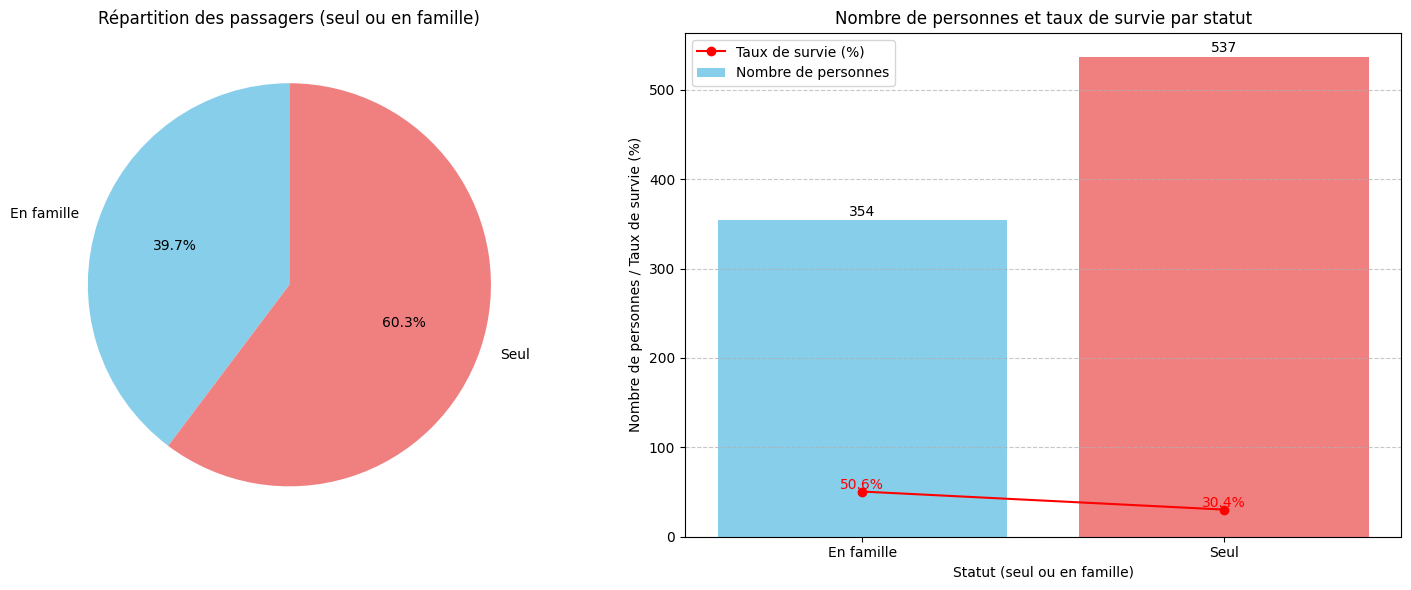

In [38]:
# prompt:  Visualisez le nombre de personnes et le taux de survie par statut seul ou pas circle graph and normal graph beside in french

import matplotlib.pyplot as plt

# 2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.
is_alone_stats = train.groupby('IsAlone')['Survived'].agg(['count', 'mean'])
is_alone_stats['mean'] *= 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Circle graph (pie chart)
axes[0].pie(is_alone_stats['count'], labels=['En famille', 'Seul'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[0].set_title('Répartition des passagers (seul ou en famille)')

# Bar graph
axes[1].bar(is_alone_stats.index.map({0: 'En famille', 1: 'Seul'}), is_alone_stats['count'], label='Nombre de personnes', color=['skyblue', 'lightcoral'])
axes[1].plot(is_alone_stats.index.map({0: 'En famille', 1: 'Seul'}), is_alone_stats['mean'], marker='o', color='red', label='Taux de survie (%)')
axes[1].set_xlabel('Statut (seul ou en famille)')
axes[1].set_ylabel('Nombre de personnes / Taux de survie (%)')
axes[1].set_title('Nombre de personnes et taux de survie par statut')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


# Add data labels for count
for i, count in enumerate(is_alone_stats['count']):
    axes[1].text(i, count + 2, str(count), ha='center', va='bottom')

# Add data labels for survival rate
for i, rate in enumerate(is_alone_stats['mean']):
    axes[1].text(i, rate, f'{rate:.1f}%', ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()


2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [60]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Select relevant numerical features for mutual information calculation
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
discrete_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone']

# Convert categorical features to numerical using one-hot encoding
train_encoded = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Fill NaN values in numerical features with the mean
for feature in numerical_features:
    mean_value = train_encoded[feature].mean()
    train_encoded[feature] = train_encoded[feature].fillna(mean_value)

# Calculate mutual information
X = train_encoded[numerical_features + list(train_encoded.columns[train_encoded.columns.str.startswith(('Sex_', 'Embarked_'))])]
y = train_encoded['Survived']
mutual_info = mutual_info_regression(X, y)

# Print results
mi_scores = pd.Series(mutual_info, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

Fare          0.127201
Sex_male      0.119789
FamilySize    0.065680
Age           0.022492
Embarked_Q    0.003330
Embarked_S    0.000928
Parch         0.000000
SibSp         0.000000
Name: MI Scores, dtype: float64


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

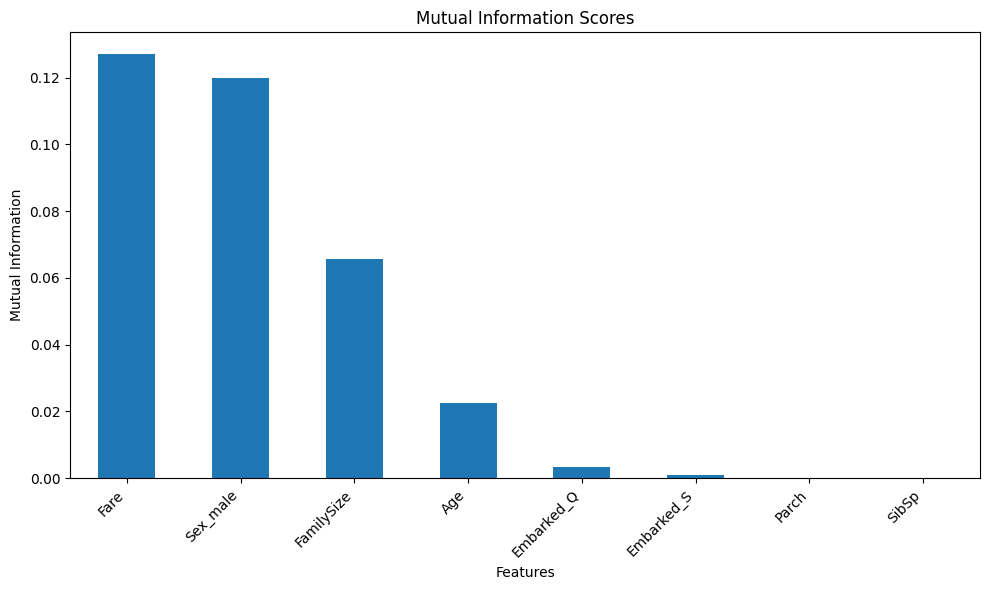

In [61]:
# prompt:  Afficher dans un graphique les scores d'information mutuelle par feature

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?



### Question 2 : Même question pour la variable Sex


### Question 3 : Comment traiter le variables liées à la famille du passager ?





## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [67]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')


3.2 Afficher l'influence du port d'embarquement sur la Survie

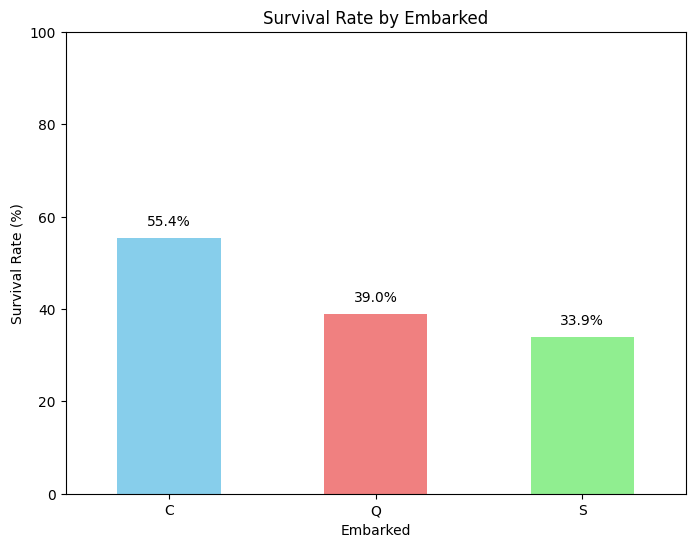

In [68]:
# prompt: Afficher l'influence du port d'embarquement sur la Survie

import matplotlib.pyplot as plt
# 3.2 Afficher l'influence du port d'embarquement sur la Survie
embarked_survival_rates = train.groupby('Embarked')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
embarked_survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

for i, rate in enumerate(embarked_survival_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()


3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [69]:
# prompt: La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

# Calculate the median fare
median_fare = train['Fare'].median()

# Fill missing 'Fare' values with the median
train['Fare'] = train['Fare'].fillna(median_fare)
test['Fare'] = test['Fare'].fillna(median_fare)


3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [70]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4, labels=False)
test['CategoricalFare'] = pd.qcut(test['Fare'], 4, labels=False)


3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

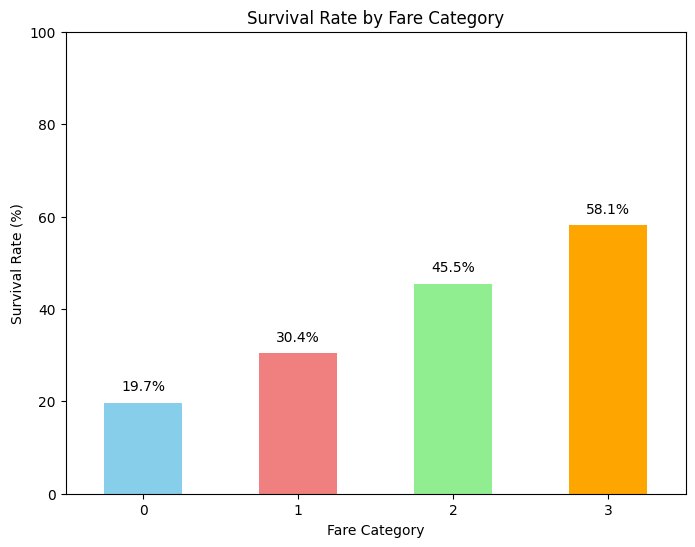

In [72]:
# prompt: Analyser l'effet de ces catégories de prix de ticket sur la survie. diff colors

import matplotlib.pyplot as plt
# 3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.
fare_survival_rates = train.groupby('CategoricalFare')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
fare_survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Survival Rate by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

for i, rate in enumerate(fare_survival_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()


3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [73]:
# prompt:  Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

import numpy as np
# Count missing Age values
missing_age_count = train['Age'].isnull().sum()
print(f"Nombre de valeurs d'âge manquantes : {missing_age_count}")

# Calculate mean and standard deviation of Age
mean_age = train['Age'].mean()
std_age = train['Age'].std()

# Generate random integer values for missing ages
random_ages = np.random.randint(low=int(mean_age - std_age), high=int(mean_age + std_age), size=missing_age_count)

# Fill missing age values with random ages
train.loc[train['Age'].isnull(), 'Age'] = random_ages

# Perform the same operation for the test dataset
missing_age_count_test = test['Age'].isnull().sum()
print(f"Nombre de valeurs d'âge manquantes dans le dataset test : {missing_age_count_test}")

random_ages_test = np.random.randint(low=int(mean_age - std_age), high=int(mean_age + std_age), size=missing_age_count_test)
test.loc[test['Age'].isnull(), 'Age'] = random_ages_test


Nombre de valeurs d'âge manquantes : 177
Nombre de valeurs d'âge manquantes dans le dataset test : 86


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

In [75]:

train['CategoricalAge'] = pd.qcut(train['Age'], 5, labels=False)
test['CategoricalAge'] = pd.qcut(test['Age'], 5, labels=False)


3.8 Analyser l'effet de ces catégories d'age sur la survie.

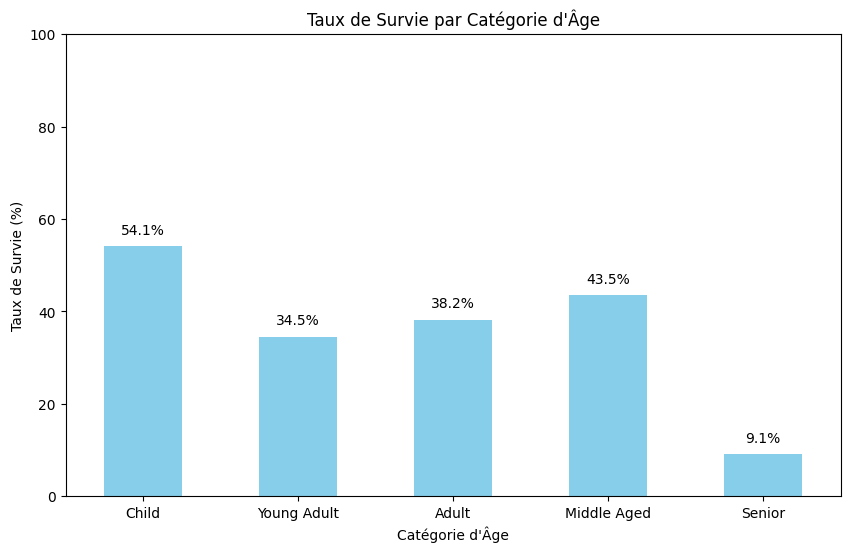

In [90]:
# Calculer les taux de survie par catégorie d'âge avec observed=False
age_category_survival_rates = train.groupby('AgeCategory', observed=False)['Survived'].mean() * 100

# Afficher les taux de survie
plt.figure(figsize=(10, 6))
age_category_survival_rates.plot(kind='bar', color='skyblue')
plt.title('Taux de Survie par Catégorie d\'Âge')
plt.xlabel('Catégorie d\'Âge')
plt.ylabel('Taux de Survie (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Ajouter des étiquettes de données
for i, rate in enumerate(age_category_survival_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()

### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)